## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [4]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [5]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [6]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [7]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [8]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [9]:
# Load the saved dataset
data = pd.read_csv('titanic.csv')
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [10]:
target = 'survived'

In [11]:
vars_cat = [var for var in data.columns if data[var].dtype=='O']

vars_num = [var for var in data.columns if var not in vars_cat and var !=target]

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


### Find missing values in variables

In [12]:
# first in numerical variables

num_vars_with_na = [var for var in vars_num if data[var].isnull().sum()>0]

len(num_vars_with_na)

2

In [13]:
# now in categorical variables

cat_vars_with_na = [var for var in vars_cat if data[var].isnull().sum()>0]
len(cat_vars_with_na)



2

### Determine cardinality of categorical variables

cabin       181
title         5
embarked      3
sex           2
dtype: int64


<AxesSubplot:>

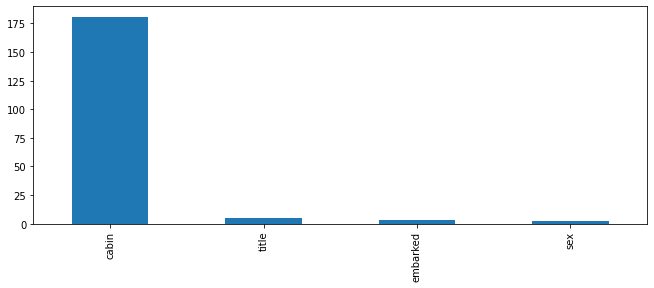

In [14]:
# Cardinality is the number of categories for each categorical variables. We determine this using pandas unique()

print(data[vars_cat].nunique().sort_values(ascending=False))

data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(11,4))

### Determine the distribution of numerical variables

['pclass', 'sibsp', 'parch']


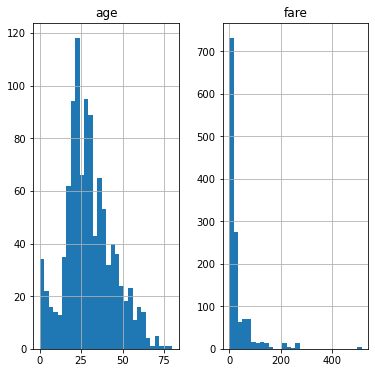

In [15]:
# Discrete variables (finite realizations)

discrete_vars = [var for var in vars_num if len(data[var].unique())<20]

print(discrete_vars)

cont_vars = [var for var in vars_num if var not in discrete_vars]

# Distribution of continuous numerical variables
data[cont_vars].hist(bins=30, figsize=(6,6))
plt.show()

### the percentage of missing across all variables

In [16]:
total_missing = data.isnull().sum().sort_values(ascending=False)
percentage_missing = data.isnull().sum()/data.isnull().count()*100
rounded_percentage_missing = round(percentage_missing, 2).sort_values(ascending=False)

missing_data = pd.concat([total_missing, rounded_percentage_missing], axis=1, keys=['Total Missing', '%'])
missing_data

,Total Missing,%
cabin,1014,77.46
age,263,20.09
embarked,2,0.15
fare,1,0.08
pclass,0,0.00
survived,0,0.00
sex,0,0.00
sibsp,0,0.00
parch,0,0.00
title,0,0.00


## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [18]:

X_train['cabin'] = X_train['cabin'].str[0]
X_test['cabin'] = X_test['cabin'].str[0]

X_train['cabin'].unique()

array([nan, 'E', 'F', 'A', 'C', 'D', 'B', 'T', 'G'], dtype=object)

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [20]:
for var in num_vars_with_na:
    median = X_train[var].median()
    
    # Adding missing indicator
    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1,0)
    X_test[var + '_na'] = np.where(X_test[var].isnull(), 1,0)
    
    #repplace missing with mode 
    X_train[var].fillna(median, inplace=True)
    X_test[var].fillna(median, inplace=True)
    
# Verify no msissing in numercal variable again
X_train[num_vars_with_na].isnull().sum()

age     0
fare    0
dtype: int64

### Replace Missing data in categorical variables with the string **Missing**

In [21]:
print(X_test[cat_vars_with_na].isnull().sum())
X_train[cat_vars_with_na] = X_train[cat_vars_with_na].fillna('Missing')
X_test[cat_vars_with_na] = X_test[cat_vars_with_na].fillna('Missing')
X_test[cat_vars_with_na].isnull().sum()

cabin       211
embarked      0
dtype: int64


cabin       0
embarked    0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [28]:
def find_frequent_labels(df, var, freq_perc):
    """" A functions that finds the most frequent categorical labels"""
    df = df.copy()
    
    temp = df.groupby(var)[var].count()/len(df)
    return temp[temp>freq_perc].index
    

for var in vars_cat:
    frequent_list = find_frequent_labels(X_train, var, 0.05)
    print(var, frequent_list)
    
    # fill the less frequent with the string Rare.
    X_train[var] = np.where(X_train[var].isin(frequent_list), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_list), X_test[var], 'Rare')
    


sex Index(['female', 'male'], dtype='object', name='sex')
cabin Index(['C', 'Missing', 'Rare'], dtype='object', name='cabin')
embarked Index(['C', 'Q', 'S'], dtype='object', name='embarked')
title Index(['Miss', 'Mr', 'Mrs', 'Rare'], dtype='object', name='title')


In [30]:
X_train[vars_cat].head(50)

,sex,cabin,embarked,title
1118,male,Missing,S,Mr
44,female,Rare,C,Miss
1072,male,Missing,Q,Mr
1130,female,Missing,S,Miss
574,male,Missing,S,Mr
1217,male,Rare,S,Mr
500,male,Missing,S,Mr
958,female,Missing,S,Mrs
269,male,Rare,S,Mr
322,female,C,C,Miss


In [33]:
X_train[vars_cat].nunique()

sex         2
cabin       3
embarked    4
title       4
dtype: int64

In [34]:
X_test[vars_cat].nunique()

sex         2
cabin       3
embarked    3
title       4
dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [39]:
for var in vars_cat:
    X_train = pd.concat([X_train, pd.get_dummies(X_train[var], prefix=var, drop_first=True)], axis=1)
    
    X_test = pd.concat([X_test, pd.get_dummies(X_test[var], prefix=var, drop_first=True)], axis=1)

In [40]:
X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)
X_train.shape, X_test.shape

((1047, 16), (262, 15))

In [ ]:
# Why are we having the testing data shape less than that of the training?
# This is probably because we had one less category in the data set before the encoding.
# We will need to add that manually. Let's confirm this first

In [41]:
X_train.head()

,pclass,age,sibsp,parch,fare,age_na,fare_na,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0,0,0,7.9250,0,0,1,1,0,0,0,1,1,0,0
44,1,41.0,0,0,134.5000,0,0,0,0,1,0,0,0,0,0,0
1072,3,24.0,0,0,7.7333,0,0,1,1,0,1,0,0,1,0,0
1130,3,18.0,0,0,7.7750,0,0,0,1,0,0,0,1,0,0,0
574,2,29.0,1,0,21.0000,0,0,1,1,0,0,0,1,1,0,0


In [42]:
X_test.head()

,pclass,age,sibsp,parch,fare,age_na,fare_na,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
1139,3,38.0,0,0,7.8958,0,0,1,1,0,0,1,1,0,0
533,2,21.0,0,1,21.0000,0,0,0,1,0,0,1,0,0,0
459,2,42.0,1,0,27.0000,0,0,1,1,0,0,1,1,0,0
1150,3,24.0,0,0,14.5000,0,0,1,1,0,0,1,1,0,0
393,2,25.0,0,0,31.5000,0,0,1,1,0,0,1,1,0,0


In [48]:
# No embarked_Rare in testing data. let's set it to a value of Zero(0) since it was absent
X_test['embarked_Rare']=0

In [49]:
# Note that now embarked_Rare will be at the end of the test set
# so in order to pass the variables in the same order, we will
# create a variables variable:

variables = [c  for c in X_train.columns]

variables

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'age_na',
 'fare_na',
 'sex_male',
 'cabin_Missing',
 'cabin_Rare',
 'embarked_Q',
 'embarked_Rare',
 'embarked_S',
 'title_Mr',
 'title_Mrs',
 'title_Rare']

### Scale the variables

- Use the standard scaler from Scikit-learn

In [53]:
# instiantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_train[variables])

# Tranform both the training and testing set
X_train = scaler.transform(X_train[variables])
X_test = scaler.transform(X_test[variables])

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [55]:
model = LogisticRegression(C=0.0005, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [59]:
# Make predictions for train set
class_ = model.predict(X_train)
proba = model.predict_proba(X_train)[:,1]

# determine roc_auc and accuracy score score for training set
print(f"Training roc_auc: {roc_auc_score(y_train,proba)}")
print(f"Training accuracy: {accuracy_score(y_train, class_)}")



# Make predictions for test set
class_ = model.predict(X_test)
proba = model.predict_proba(X_test)[:,1]

print()

# determine roc_auc and accuracy score score for testing set
print(f"Testing roc_auc: {roc_auc_score(y_test,proba)}")
print(f"Testing accuracy: {accuracy_score(y_test, class_)}")

Training roc_auc: 0.8401043276661514
Training accuracy: 0.7144221585482331

Testing roc_auc: 0.8433333333333335
Testing accuracy: 0.7022900763358778


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**